[*********************100%***********************]  4 of 4 completed


Daily Returns:
 Ticker                         AAPL     GOOGL      MSFT      TSLA
Date                                                             
2020-01-03 00:00:00+00:00 -0.009722 -0.005231 -0.012452  0.029633
2020-01-06 00:00:00+00:00  0.007968  0.026654  0.002585  0.019255
2020-01-07 00:00:00+00:00 -0.004703 -0.001931 -0.009118  0.038801
2020-01-08 00:00:00+00:00  0.016086  0.007118  0.015928  0.049205
2020-01-09 00:00:00+00:00  0.021241  0.010498  0.012493 -0.021945

Portfolio Data with ESG Scores:
                0  ESG_Score
Ticker                     
AAPL    0.001024         85
GOOGL   0.000573         75
MSFT    0.000808         90
TSLA    0.002965         60

Optimal Portfolio Weights based on Multi-Factor Model with ESG Integration:
 Ticker
AAPL     0.271226
GOOGL    0.237131
MSFT     0.285354
TSLA     0.206289
dtype: float64

Predicted Return for AAPL in 2024: [-1373.90935408]

Portfolio Returns under Stress Test Scenario:
 Ticker                         AAPL     GOOGL  

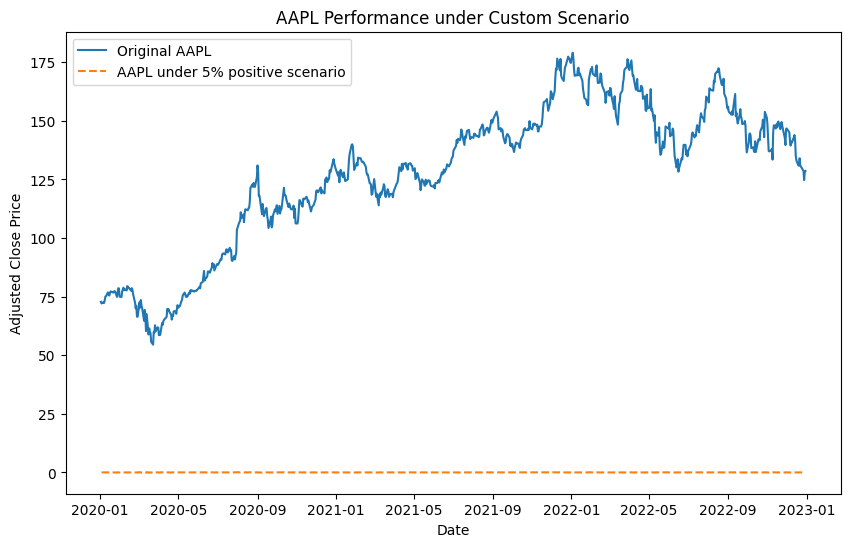


Achievement Status: High Return Badge Earned

Optimal Weights for Crypto & Alternative Investments: [0.25, 0.25, 0.25, 0.25]


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf
import datetime

# Section 1: Data Collection and Cleaning
# ----------------------------------------

# Define a function to fetch historical stock data using yfinance API
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Fetch data for a set of stocks
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-01-01'
stock_data = fetch_data(tickers, start_date, end_date)
stock_data.dropna(inplace=True)

# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Display the first few rows of stock returns
print("Daily Returns:\n", returns.head())

# Section 2: ESG Data Integration
# --------------------------------

# Mock ESG data (in practice, fetch from an API or data provider)
esg_data = pd.DataFrame({
    'Ticker': ['AAPL', 'GOOGL', 'MSFT', 'TSLA'],
    'ESG_Score': [85, 75, 90, 60]
})

# Combine ESG data with returns
portfolio_data = pd.concat([returns.mean(), esg_data.set_index('Ticker')], axis=1).dropna()
print("\nPortfolio Data with ESG Scores:\n", portfolio_data)

# Section 3: Multi-Factor Portfolio Optimization
# ----------------------------------------------

# Define the portfolio optimization function based on multi-factor model
def optimize_portfolio(returns, esg_scores, risk_tolerance=0.5):
    esg_weighting = 0.3  # Importance of ESG in optimization
    risk_adjusted_returns = returns / returns.std()  # Risk-adjusted returns
    combined_score = (1 - esg_weighting) * risk_adjusted_returns + esg_weighting * esg_scores
    weights = combined_score / combined_score.sum()  # Normalize weights
    return weights

# Calculate optimal weights using the ESG-adjusted multi-factor model
optimal_weights = optimize_portfolio(portfolio_data[0], portfolio_data['ESG_Score'])
print("\nOptimal Portfolio Weights based on Multi-Factor Model with ESG Integration:\n", optimal_weights)

# Section 4: Machine Learning for Predictive Adjustments
# ------------------------------------------------------

# Prepare data for machine learning (example using linear regression for prediction)
def train_ml_model(returns):
    X = returns.index.astype('int64').values.reshape(-1, 1)
    y = returns.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict future returns
    future_dates = np.array([datetime.datetime(2024, 1, 1).toordinal()]).reshape(-1, 1)
    future_prediction = model.predict(future_dates)
    
    return future_prediction

# Train model and predict returns for 2024
future_returns = train_ml_model(stock_data['AAPL'])
print("\nPredicted Return for AAPL in 2024:", future_returns)

# Section 5: Risk Management and Stress Testing
# ---------------------------------------------

# Stress testing: Define a function to simulate portfolio performance under stressed market conditions
def stress_test(returns, stress_factor=-0.2):
    stressed_returns = returns * (1 + stress_factor)
    return stressed_returns

# Perform stress test with a 20% market decline scenario
stressed_returns = stress_test(returns)
print("\nPortfolio Returns under Stress Test Scenario:\n", stressed_returns.head())

# Scenario analysis for custom market changes
def scenario_impact(returns, scenario_change):
    return returns * (1 + scenario_change)

# Example scenario: 5% positive market change
scenario_change = 0.05
scenario_returns = scenario_impact(returns, scenario_change).reindex(stock_data.index).ffill()  # Use .ffill() to avoid warning
print("\nPortfolio Returns under Custom Scenario:\n", scenario_returns.head())

# Section 6: Visualization of Portfolio Performance
# -------------------------------------------------

# Visualize portfolio performance under different scenarios
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['AAPL'], label='Original AAPL')
plt.plot(stock_data.index, scenario_returns['AAPL'], label='AAPL under 5% positive scenario', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('AAPL Performance under Custom Scenario')
plt.legend()
plt.show()

# Section 7: Gamify the Optimization Process
# ------------------------------------------

# Example achievement system based on portfolio performance
def check_achievement(portfolio_return):
    if portfolio_return > 0.15:
        return "High Return Badge Earned"
    return "Keep Optimizing"

# Example portfolio return
portfolio_return = 0.16
achievement = check_achievement(portfolio_return)
print("\nAchievement Status:", achievement)

# Section 8: Integrate Cryptocurrency and Alternative Investments
# ---------------------------------------------------------------

# Example data for cryptocurrency and alternative investments
crypto_data = pd.DataFrame({
    'Asset': ['Bitcoin', 'Ethereum', 'Gold', 'Real Estate'],
    'Return': [0.2, 0.25, 0.05, 0.08],
    'Risk': [0.3, 0.35, 0.1, 0.15]
})

# Basic optimization function for crypto and alternative investments
def optimize_crypto_portfolio(crypto_df):
    weights = [1/crypto_df.shape[0]] * crypto_df.shape[0]  # Equal weighting
    return weights

crypto_weights = optimize_crypto_portfolio(crypto_data)
print("\nOptimal Weights for Crypto & Alternative Investments:", crypto_weights)


In [6]:
pip install -r requirements.txt


   ---------------------------------------- 0.0/96.9 kB ? eta -:--:--
   ---------------------------------------- 96.9/96.9 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 14.3 MB/s eta 0:00:01
   - -------------------------------------- 0.5/10.6 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/10.6 MB 7.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 7.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 7.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 7.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 7.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.6 MB 7.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.6 MB 7.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.0/10.6 MB 7.2 MB/s eta 0:00:02
   --------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\sahil\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\SAHIL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn yfinance


     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/939.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/939.5 kB ? eta -:--:--
     -- ---------------------------------- 61.4/939.5 kB 544.7 kB/s eta 0:00:02
     -- ---------------------------------- 61.4/939.5 kB 544.7 kB/s eta 0:00:02
     --- --------------------------------- 81.9/939.5 kB 459.5 kB/s eta 0:00:02
     --- --------------------------------- 81.9/939.5 kB 459.5 kB/s eta 0:00:02
     --- --------------------------------- 81.9/939.5 kB 459.5 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/939.5 kB 448.2 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/939.5 kB 448.2 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/939.5 kB 448.2 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/939.5 kB 448.2 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/939.5 kB 44


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\SAHIL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
